#### Reading the wind speed file.

In [1]:
# info here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# http://www.smartcomputerlab.org/m6/Lab1.regression.tf.keras.pdf


In [2]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning.
import keras as kr
import tensorflow as tf

import numpy as np

#### Loading data.

In [3]:
# Limiting to .3 decimal points.
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Setting windspeedFile
windspeedFile = "Windspeed.txt"

# Reading windspeedFile, skipping headings
dataset = np.loadtxt(windspeedFile, delimiter=",", skiprows=1)

# Windspeed data.
X = dataset[:,0]
# Power data.
y = dataset[:,1]

#### Some functions.

In [4]:
def getModelData(dataset, predictions):
    '''
    Will display the dataset with predictions and expected.
    '''
    if (len(dataset.shape) == 1):
        for i in range(len(dataset)):
            print('%.3f => %.3f (expected %.3f)' % (dataset[i], predictions[i], y[i]))
    else:
        for i in range(len(dataset)):
            print('%.3f => %.3f (expected %.3f)' % (dataset[i][1], predictions[i][1], y[i]))

def getWindspeed():
    '''
    Get request for windspeed value.
    '''
    import requests
    URL = "http://127.0.0.1:5000/api/windspeed"
    
    # sending get request and saving the response as response object 
    r = requests.get(url = URL) 

    # extracting data in json format 
    data = r.json()
    windspeed = data['value']
    print("Windspeed: ", windspeed)
    return windspeed


def predictPower(windspeed):
    '''
    Will display the predicted power for data generated with linear regression.
    '''
    # make a prediction
    aValue = [value]
    ynew = model.predict(aValue)

    print("Power prediction: %.3f" % ynew)
    
def predictPowerPR(poly, windspeed):
    '''
    Will display the predicted power for data generated with polynomial regression.
    '''
    # make a pre
    value = np.array([windspeed])
    aValue = poly.fit_transform(value.reshape(-1,1))
    ynew = model.predict(aValue)

    print("Power prediction: %.3f" % ynew[0][1])

### Set up

In [5]:
numEpochs = 250

# Linear Regression

In [6]:
# Create model.
from keras.models import Sequential
from keras.layers import Dense

thisShape = 1

model = Sequential()
model.add(Dense(12, input_dim=thisShape, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(thisShape, activation='relu'))
    

# Train model.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X, y, epochs=numEpochs, verbose=True)
    

Epoch 1/250
16/16 [==============================] - 0s 687us/step - loss: 3893.3325
Epoch 2/250
16/16 [==============================] - 0s 750us/step - loss: 3710.3931
Epoch 3/250
16/16 [==============================] - 0s 812us/step - loss: 3523.9341
Epoch 4/250
16/16 [==============================] - 0s 750us/step - loss: 3333.9363
Epoch 5/250
16/16 [==============================] - 0s 750us/step - loss: 3151.3660
Epoch 6/250
16/16 [==============================] - 0s 813us/step - loss: 2995.3015
Epoch 7/250
16/16 [==============================] - 0s 625us/step - loss: 2834.7798
Epoch 8/250
16/16 [==============================] - 0s 500us/step - loss: 2634.8569
Epoch 9/250
16/16 [==============================] - 0s 687us/step - loss: 2342.1926
Epoch 10/250
16/16 [==============================] - 0s 687us/step - loss: 2040.3309
Epoch 11/250
16/16 [==============================] - 0s 750us/step - loss: 1751.7937
Epoch 12/250
16/16 [==============================] - 0s 812us/

16/16 [==============================] - 0s 875us/step - loss: 278.4476
Epoch 97/250
16/16 [==============================] - 0s 687us/step - loss: 277.9401
Epoch 98/250
16/16 [==============================] - 0s 687us/step - loss: 277.3077
Epoch 99/250
16/16 [==============================] - 0s 687us/step - loss: 276.3047
Epoch 100/250
16/16 [==============================] - 0s 750us/step - loss: 275.7673
Epoch 101/250
16/16 [==============================] - 0s 750us/step - loss: 274.6000
Epoch 102/250
16/16 [==============================] - 0s 687us/step - loss: 273.8102
Epoch 103/250
16/16 [==============================] - 0s 750us/step - loss: 273.1100
Epoch 104/250
16/16 [==============================] - 0s 562us/step - loss: 272.4612
Epoch 105/250
16/16 [==============================] - 0s 625us/step - loss: 271.3375
Epoch 106/250
16/16 [==============================] - 0s 687us/step - loss: 270.7050
Epoch 107/250
16/16 [==============================] - 0s 750us/step - 

16/16 [==============================] - 0s 812us/step - loss: 205.5082
Epoch 192/250
16/16 [==============================] - 0s 750us/step - loss: 205.3216
Epoch 193/250
16/16 [==============================] - 0s 750us/step - loss: 204.4045
Epoch 194/250
16/16 [==============================] - 0s 812us/step - loss: 203.7403
Epoch 195/250
16/16 [==============================] - 0s 937us/step - loss: 203.2883
Epoch 196/250
16/16 [==============================] - 0s 937us/step - loss: 202.3034
Epoch 197/250
16/16 [==============================] - 0s 813us/step - loss: 201.7020
Epoch 198/250
16/16 [==============================] - 0s 750us/step - loss: 201.2818
Epoch 199/250
16/16 [==============================] - 0s 688us/step - loss: 201.0112
Epoch 200/250
16/16 [==============================] - 0s 562us/step - loss: 201.3840
Epoch 201/250
16/16 [==============================] - 0s 562us/step - loss: 199.4297
Epoch 202/250
16/16 [==============================] - 0s 687us/step

In [7]:
# Prediction.
lr_prediction = model.predict(X)

In [8]:
value = 15#getWindspeed()
predictPower(value)

Power prediction: 61.149


# PolynomialFeatures

In [9]:
# PolynomialFeatures.
polyDegree = 3


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=polyDegree)

X_2 = poly.fit_transform(X.reshape(-1,1))

In [10]:
# Create model.
from keras.models import Sequential
from keras.layers import Dense

thisShape = 1+polyDegree

model = Sequential()
model.add(Dense(64, input_dim=thisShape, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(thisShape, activation='relu'))
    

# Train model.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
pr_history = model.fit(X_2, y, epochs=numEpochs, verbose=True)
    

Epoch 1/250
16/16 [==============================] - 0s 937us/step - loss: 181296.2656
Epoch 2/250
16/16 [==============================] - 0s 875us/step - loss: 2712.2202
Epoch 3/250
16/16 [==============================] - 0s 938us/step - loss: 2445.5237
Epoch 4/250
16/16 [==============================] - 0s 937us/step - loss: 2418.8438
Epoch 5/250
16/16 [==============================] - 0s 937us/step - loss: 2416.3047
Epoch 6/250
16/16 [==============================] - 0s 1000us/step - loss: 2379.1887
Epoch 7/250
16/16 [==============================] - 0s 937us/step - loss: 2384.4016
Epoch 8/250
16/16 [==============================] - 0s 1000us/step - loss: 2420.6067
Epoch 9/250
16/16 [==============================] - 0s 812us/step - loss: 2376.2371
Epoch 10/250
16/16 [==============================] - 0s 812us/step - loss: 2362.4465
Epoch 11/250
16/16 [==============================] - 0s 1000us/step - loss: 2372.2517
Epoch 12/250
16/16 [==============================] - 0s 9

16/16 [==============================] - 0s 875us/step - loss: 136.0502
Epoch 97/250
16/16 [==============================] - 0s 875us/step - loss: 155.1361
Epoch 98/250
16/16 [==============================] - 0s 812us/step - loss: 162.4889
Epoch 99/250
16/16 [==============================] - 0s 875us/step - loss: 92.2328
Epoch 100/250
16/16 [==============================] - 0s 812us/step - loss: 107.5030
Epoch 101/250
16/16 [==============================] - 0s 875us/step - loss: 119.9912
Epoch 102/250
16/16 [==============================] - 0s 812us/step - loss: 99.7068
Epoch 103/250
16/16 [==============================] - 0s 812us/step - loss: 125.5277
Epoch 104/250
16/16 [==============================] - 0s 812us/step - loss: 115.3707
Epoch 105/250
16/16 [==============================] - 0s 875us/step - loss: 106.4456
Epoch 106/250
16/16 [==============================] - 0s 812us/step - loss: 102.4968
Epoch 107/250
16/16 [==============================] - 0s 812us/step - lo

16/16 [==============================] - 0s 811us/step - loss: 980.6859
Epoch 191/250
16/16 [==============================] - 0s 813us/step - loss: 633.7717
Epoch 192/250
16/16 [==============================] - 0s 1ms/step - loss: 635.3079
Epoch 193/250
16/16 [==============================] - 0s 1ms/step - loss: 443.6587
Epoch 194/250
16/16 [==============================] - 0s 1ms/step - loss: 211.9308
Epoch 195/250
16/16 [==============================] - 0s 1ms/step - loss: 260.6627
Epoch 196/250
16/16 [==============================] - 0s 875us/step - loss: 211.7770
Epoch 197/250
16/16 [==============================] - 0s 938us/step - loss: 150.8183
Epoch 198/250
16/16 [==============================] - 0s 937us/step - loss: 205.6137
Epoch 199/250
16/16 [==============================] - 0s 875us/step - loss: 196.8804
Epoch 200/250
16/16 [==============================] - 0s 875us/step - loss: 141.2660
Epoch 201/250
16/16 [==============================] - 0s 1000us/step - loss

In [11]:
# Prediction.
rp_predictions = model.predict(X_2)

## Display

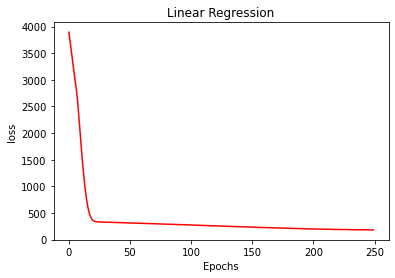

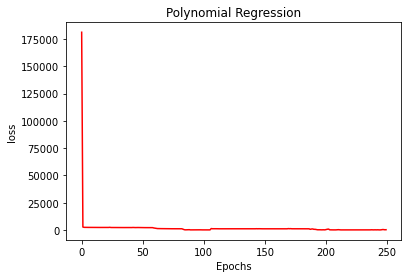

In [12]:
# displayLoss():
# displayLoss():
plt.title("Linear Regression")
plt.plot(tf_history.history['loss'], color="red")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

plt.title("Polynomial Regression")
plt.plot(pr_history.history['loss'], color="red")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

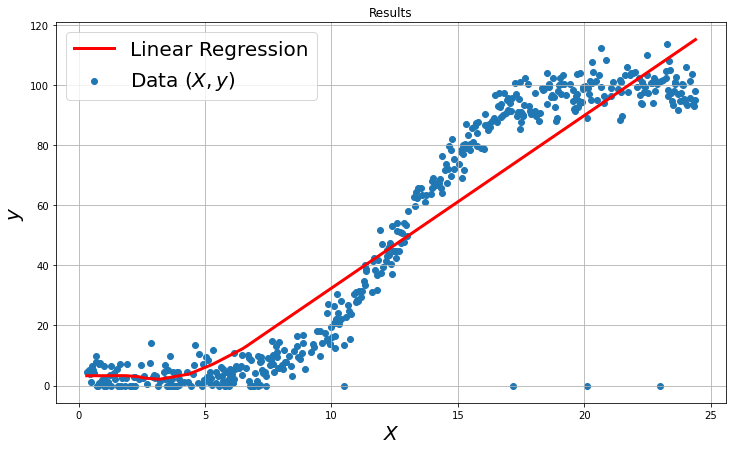

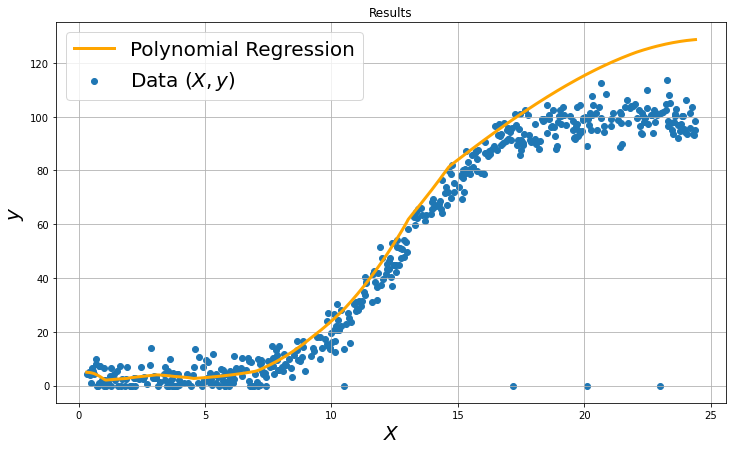

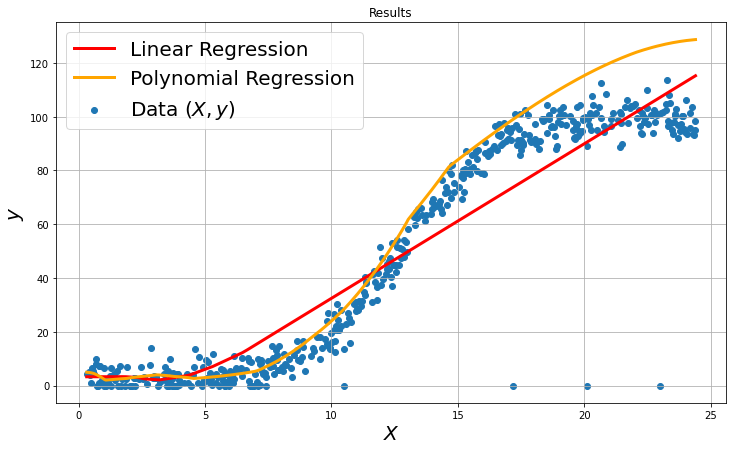

In [13]:
# displayPlot():
plt.figure(figsize=(12,7))
plt.title('Results')
plt.scatter(X_2[:,1], y, label='Data $(X, y)$')
plt.plot(X, lr_prediction, color='red', label='Linear Regression',linewidth=3.0)
#plt.plot(X_2[:,1], rp_predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(12,7))
plt.title('Results')
plt.scatter(X_2[:,1], y, label='Data $(X, y)$')
#plt.plot(X, y_hat, color='red', label='Linear Regression',linewidth=3.0)
plt.plot(X_2[:,1], rp_predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(12,7))
plt.title('Results')
plt.scatter(X_2[:,1], y, label='Data $(X, y)$')
plt.plot(X, lr_prediction, color='red', label='Linear Regression',linewidth=3.0)
plt.plot(X_2[:,1], rp_predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

In [14]:
windspeed = 15#getWindspeed()
predictPowerPR(poly, value)

Power prediction: 83.936
